In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
# from DFCompare import *

In [22]:
# Read results from previous simulation

def readPreviousResults(previous_simulation_file):
    """Reads previous simulation results saved in the results variable for a given time-step"""
    
    with open(previous_simulation_file, "rb") as handle:
        previous_results = pickle.load(handle)

    return previous_results



def getResults(results, variable_name):
    """Get a vriable results from a given time-step """
    for i in range(len(results)):
        if results[i][0] == variable_name:
            variable = results[i][1]
            return variable


def readResultsVariable(file_address, variable_name):
    with open(file_address + variable_name + ".pickle", "rb") as handle:
        variable = pickle.load(handle)
    return variable


def plotCompareSimulations(results, title, label_x, label_y, save_filename):

    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    # plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    


    nb_simulations = len(results)

    for i in range(nb_simulations):
        name_simulation = results[i][0]
        x_values = results[i][1]
        y_values = results[i][2]
        plt.plot(x_values, y_values, label=name_simulation)
    plt.legend()
    plt.savefig(save_filename)
    plt.show()




def plotConvergence(results, meshes, title, label_x, label_y, save_filename):

    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    nb_simulations = len(meshes)
    x_values = np.zeros(nb_simulations)
    final_values = np.zeros(nb_simulations)

    for i in range(nb_simulations):
        x_values[i] = meshes[i]
        final_values[i] = max(results[i][2])
    plt.plot(x_values, final_values, marker='.')

    plt.legend()
    plt.savefig(save_filename)
    plt.show()



def plotConvergenceComparison(results1, results2, meshes, title, label_x, label_y, save_filename):

    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    nb_simulations = len(meshes)
    x_values = np.zeros(nb_simulations)
    final_values1 = np.zeros(nb_simulations)
    final_values2 = np.zeros(nb_simulations)

    for i in range(nb_simulations):
        x_values[i] = meshes[i]
        final_values1[i] = max(results1[i][2])
        final_values2[i] = max(results2[i][2])
    plt.plot(x_values, final_values1, marker='.',label='Uniform mesh')
    plt.plot(x_values, final_values2, marker='.',label="Non-uniform mesh")

    plt.legend()
    plt.savefig(save_filename)
    plt.show()

### LIP: uniform mesh

In [8]:
# Uniform mesh 1250 
filepath = "LOG/mesh_study/lipfield_uniform_mesh/"
file_address = filepath + "1250el/lipfield_"
lip_time_data_uniform_1250el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_uniform_1250el[0]
lip_time_simulation_uniform_1250el = lip_time_data_uniform_1250el[0] - 0.5*10**-7
lip_dt_uniform_1250el = lip_time_data_uniform_1250el[1]
lip_n_steps_uniform_1250el = int(lip_time_simulation_uniform_1250el/ lip_dt_uniform_1250el)

# n_steps_uniform_1250el = time_data_uniform_1250el[2]
lip_size_uniform_1250el = int(lip_n_steps_uniform_1250el / 10 +1)
lip_n_fragments_uniform_1250el = np.zeros(lip_size_uniform_1250el)
lip_avg_stress_bar_uniform_1250el = np.zeros(lip_size_uniform_1250el)
lip_energies_uniform_1250el = []
lip_sfrag_uniform_1250el = []
i = 0
for n in range(lip_n_steps_uniform_1250el):
    if n%10 ==0:
        lip_results_uniform_1250el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        lip_n_fragments_uniform_1250el[i] = getResults(lip_results_uniform_1250el, "n_fragments")
        lip_avg_stress_bar_uniform_1250el[i] = getResults(lip_results_uniform_1250el, "avg_stress_bar")
        lip_energies_uniform_1250el.append(getResults(lip_results_uniform_1250el, "energies"))
        lip_sfrag_uniform_1250el.append(getResults(lip_results_uniform_1250el, "frag_lengths"))
        i += 1

# Uniform mesh 2500 
filepath = "LOG/mesh_study/lipfield_uniform_mesh/"
file_address = filepath + "2500el/lipfield_"
lip_time_data_uniform_2500el = readResultsVariable(file_address, "time_data") 

lip_time_simulation_uniform_2500el = lip_time_data_uniform_2500el [0]- 0.5*10**-7
lip_dt_uniform_2500el = lip_time_data_uniform_2500el[1]
lip_n_steps_uniform_2500el = int(lip_time_simulation_uniform_2500el/ lip_dt_uniform_2500el)

# n_steps_uniform_2500el = time_data_uniform_2500el[2]
lip_size_uniform_2500el = int(lip_n_steps_uniform_2500el / 10 +1)
lip_n_fragments_uniform_2500el = np.zeros(lip_size_uniform_2500el)
lip_avg_stress_bar_uniform_2500el = np.zeros(lip_size_uniform_2500el)
lip_energies_uniform_2500el = []
lip_sfrag_uniform_2500el = []
i = 0
for n in range(lip_n_steps_uniform_2500el):
    if n%10 ==0:
        lip_results_uniform_2500el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        lip_n_fragments_uniform_2500el[i] = getResults(lip_results_uniform_2500el, "n_fragments")
        lip_avg_stress_bar_uniform_2500el[i] = getResults(lip_results_uniform_2500el, "avg_stress_bar")
        lip_energies_uniform_2500el.append(getResults(lip_results_uniform_2500el, "energies"))
        lip_sfrag_uniform_2500el.append(getResults(lip_results_uniform_2500el, "frag_lengths"))
        i += 1

# Uniform mesh 5000 
filepath = "LOG/mesh_study/lipfield_uniform_mesh/"
file_address = filepath + "5000el/lipfield_"
lip_time_data_uniform_5000el = readResultsVariable(file_address, "time_data")

lip_time_simulation_uniform_5000el = lip_time_data_uniform_5000el[0] 
lip_dt_uniform_5000el = lip_time_data_uniform_5000el[1]
lip_n_steps_uniform_5000el = int(lip_time_simulation_uniform_5000el/ lip_dt_uniform_5000el)

# n_steps_uniform_5000el = time_data_uniform_5000el[2]
lip_size_uniform_5000el = int(lip_n_steps_uniform_5000el / 10 +1)
lip_n_fragments_uniform_5000el = np.zeros(lip_size_uniform_5000el)
lip_avg_stress_bar_uniform_5000el = np.zeros(lip_size_uniform_5000el)
lip_energies_uniform_5000el = []
lip_sfrag_uniform_5000el = []
i = 0
for n in range(lip_n_steps_uniform_5000el):
    if n%10 ==0:
        lip_results_uniform_5000el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        lip_n_fragments_uniform_5000el[i] = getResults(lip_results_uniform_5000el, "n_fragments")
        lip_avg_stress_bar_uniform_5000el[i] = getResults(lip_results_uniform_5000el, "avg_stress_bar")
        lip_energies_uniform_5000el.append(getResults(lip_results_uniform_5000el, "energies"))
        lip_sfrag_uniform_5000el.append(getResults(lip_results_uniform_5000el, "frag_lengths"))
        i += 1

# Uniform mesh 7500 
filepath = "LOG/mesh_study/lipfield_uniform_mesh/"
file_address = filepath + "7500el/lipfield_"
lip_time_data_uniform_7500el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_uniform_7500el[0]
lip_time_simulation_uniform_7500el = lip_time_data_uniform_7500el[0]
lip_dt_uniform_7500el = lip_time_data_uniform_7500el[1]
lip_n_steps_uniform_7500el = int(lip_time_simulation_uniform_7500el/ lip_dt_uniform_7500el)

# n_steps_uniform_7500el = time_data_uniform_7500el[2]
lip_size_uniform_7500el = int(lip_n_steps_uniform_7500el / 10)
lip_n_fragments_uniform_7500el = np.zeros(lip_size_uniform_7500el)
lip_avg_stress_bar_uniform_7500el = np.zeros(lip_size_uniform_7500el)
lip_energies_uniform_7500el = []
lip_sfrag_uniform_7500el = []
i = 0
for n in range(lip_n_steps_uniform_7500el):
    if n%10 ==0:
        lip_results_uniform_7500el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        lip_n_fragments_uniform_7500el[i] = getResults(lip_results_uniform_7500el, "n_fragments")
        lip_avg_stress_bar_uniform_7500el[i] = getResults(lip_results_uniform_7500el, "avg_stress_bar")
        lip_energies_uniform_7500el.append(getResults(lip_results_uniform_7500el, "energies"))
        lip_sfrag_uniform_7500el.append(getResults(lip_results_uniform_7500el, "frag_lengths"))
        i += 1

### CZM: Uniform mesh

In [9]:
# Uniform mesh 1250 
filepath = "src_akantu/LOG/mesh_study/czm_uniform_mesh/"
file_address = filepath + "1250el/akantu_"
aka_time_data_uniform_1250el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_uniform_1250el[0]
aka_time_simulation_uniform_1250el = aka_time_data_uniform_1250el[0] 
aka_dt_uniform_1250el = aka_time_data_uniform_1250el[1]
aka_n_steps_uniform_1250el = int(aka_time_simulation_uniform_1250el/ aka_dt_uniform_1250el)

# n_steps_uniform_1250el = time_data_uniform_1250el[2]
aka_size_uniform_1250el = int(aka_n_steps_uniform_1250el)
aka_n_fragments_uniform_1250el = np.zeros(aka_size_uniform_1250el)
aka_avg_stress_bar_uniform_1250el = np.zeros(aka_size_uniform_1250el)
aka_energies_uniform_1250el = []
aka_sfrag_uniform_1250el = []
i = 0
for n in range(aka_n_steps_uniform_1250el):
    # if n%10 ==0:
    aka_results_uniform_1250el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
    aka_n_fragments_uniform_1250el[i] = getResults(aka_results_uniform_1250el, "n_fragments")
    aka_avg_stress_bar_uniform_1250el[i] = getResults(aka_results_uniform_1250el, "avg_stress_bar")
    aka_energies_uniform_1250el.append(getResults(aka_results_uniform_1250el, "energies"))
    aka_sfrag_uniform_1250el.append(getResults(aka_results_uniform_1250el, "frag_lengths"))
    i += 1






In [10]:
# Uniform mesh 2500 
filepath = "src_akantu/LOG/mesh_study/czm_uniform_mesh/"
file_address = filepath + "2500el/akantu_"
aka_time_data_uniform_2500el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_uniform_2500el[0]
aka_time_simulation_uniform_2500 = aka_time_data_uniform_2500el[0]
aka_dt_uniform_2500el = aka_time_data_uniform_2500el[1]
aka_n_steps_uniform_2500el = int(aka_time_simulation_uniform_2500/ aka_dt_uniform_2500el)

# n_steps_uniform_2500el = time_data_uniform_2500el[2]
aka_size_uniform_2500el = int(aka_n_steps_uniform_2500el)
aka_n_fragments_uniform_2500el = np.zeros(aka_size_uniform_2500el)
aka_avg_stress_bar_uniform_2500el = np.zeros(aka_size_uniform_2500el)
aka_energies_uniform_2500el = []
aka_sfrag_uniform_2500el = []
i = 0
for n in range(aka_n_steps_uniform_2500el):
    # if n%10 ==0:
    aka_results_uniform_2500el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
    aka_n_fragments_uniform_2500el[i] = getResults(aka_results_uniform_2500el, "n_fragments")
    aka_avg_stress_bar_uniform_2500el[i] = getResults(aka_results_uniform_2500el, "avg_stress_bar")
    aka_energies_uniform_2500el.append(getResults(aka_results_uniform_2500el, "energies"))
    aka_sfrag_uniform_2500el.append(getResults(aka_results_uniform_2500el, "frag_lengths"))
    i += 1

In [11]:
# Uniform mesh 5000 
filepath = "src_akantu/LOG/mesh_study/czm_uniform_mesh/"
file_address = filepath + "5000el/akantu_"
aka_time_data_uniform_5000el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_uniform_5000el[0]
time_simulation = aka_time_data_uniform_5000el[0] - 1*10**-7
aka_dt_uniform_5000el = aka_time_data_uniform_5000el[1]
aka_n_steps_uniform_5000el = int(time_simulation/ aka_dt_uniform_5000el)

# n_steps_uniform_5000el = time_data_uniform_5000el[2]
aka_size_uniform_5000el = int(aka_n_steps_uniform_5000el)
aka_n_fragments_uniform_5000el = np.zeros(aka_size_uniform_5000el)
aka_avg_stress_bar_uniform_5000el = np.zeros(aka_size_uniform_5000el)
aka_energies_uniform_5000el = []
aka_sfrag_uniform_5000el = []
i = 0
for n in range(aka_n_steps_uniform_5000el):
    # if n%10 ==0:
    aka_results_uniform_5000el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
    aka_n_fragments_uniform_5000el[i] = getResults(aka_results_uniform_5000el, "n_fragments")
    aka_avg_stress_bar_uniform_5000el[i] = getResults(aka_results_uniform_5000el, "avg_stress_bar")
    aka_energies_uniform_5000el.append(getResults(aka_results_uniform_5000el, "energies"))
    aka_sfrag_uniform_5000el.append(getResults(aka_results_uniform_5000el, "frag_lengths"))
    i += 1

In [12]:
# Uniform mesh 7500 
filepath = "src_akantu/LOG/mesh_study/czm_uniform_mesh/"
file_address = filepath + "7500el/akantu_"
aka_time_data_uniform_7500el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_uniform_7500el[0]
time_simulation = aka_time_data_uniform_7500el[0] - 1*10**-7
aka_dt_uniform_7500el = aka_time_data_uniform_7500el[1]
aka_n_steps_uniform_7500el = int(time_simulation/ aka_dt_uniform_7500el)

# n_steps_uniform_7500el = time_data_uniform_7500el[2]
aka_size_uniform_7500el = int(aka_n_steps_uniform_7500el)
aka_n_fragments_uniform_7500el = np.zeros(aka_size_uniform_7500el)
aka_avg_stress_bar_uniform_7500el = np.zeros(aka_size_uniform_7500el)
aka_energies_uniform_7500el = []
aka_sfrag_uniform_7500el = []
i = 0
for n in range(aka_n_steps_uniform_7500el):
    # if n%10 ==0:
    aka_results_uniform_7500el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
    aka_n_fragments_uniform_7500el[i] = getResults(aka_results_uniform_7500el, "n_fragments")
    aka_avg_stress_bar_uniform_7500el[i] = getResults(aka_results_uniform_7500el, "avg_stress_bar")
    aka_energies_uniform_7500el.append(getResults(aka_results_uniform_7500el, "energies"))
    aka_sfrag_uniform_7500el.append(getResults(aka_results_uniform_7500el, "frag_lengths"))
    i += 1

### LIP: non-uniform mesh

In [13]:
# Non-Uniform mesh 1250 
filepath = "LOG/mesh_study/lipfield_non_uniform_mesh/"
file_address = filepath + "1250el/lipfield_"
lip_time_data_non_uniform_1250el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_non_uniform_1250el[0]
lip_time_simulation_non_uniform_1250el = lip_time_data_non_uniform_1250el[0]  - 0.5*10**-7
lip_dt_non_uniform_1250el = lip_time_data_non_uniform_1250el[1]
lip_n_steps_non_uniform_1250el = int(lip_time_simulation_non_uniform_1250el/ lip_dt_non_uniform_1250el)

# n_steps_non_uniform_1250el = time_data_non_uniform_1250el[2]
lip_size_non_uniform_1250el = int(lip_n_steps_non_uniform_1250el / 10 +1)
lip_n_fragments_non_uniform_1250el = np.zeros(lip_size_non_uniform_1250el)
lip_avg_stress_bar_non_uniform_1250el = np.zeros(lip_size_non_uniform_1250el)
lip_energies_non_uniform_1250el = []
lip_sfrag_non_uniform_1250el = []
i = 0
for n in range(lip_n_steps_non_uniform_1250el):
    if n%10 ==0:
        lip_results_non_uniform_1250el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        lip_n_fragments_non_uniform_1250el[i] = getResults(lip_results_non_uniform_1250el, "n_fragments")
        lip_avg_stress_bar_non_uniform_1250el[i] = getResults(lip_results_non_uniform_1250el, "avg_stress_bar")
        lip_energies_non_uniform_1250el.append(getResults(lip_results_non_uniform_1250el, "energies"))
        lip_sfrag_non_uniform_1250el.append(getResults(lip_results_non_uniform_1250el, "frag_lengths"))
        i += 1


# Non-Uniform mesh 2500 
filepath = "LOG/mesh_study/lipfield_non_uniform_mesh/"
file_address = filepath + "2500el/lipfield_"
lip_time_data_non_uniform_2500el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_non_uniform_2500el[0]
lip_time_simulation_non_uniform_2500el = lip_time_data_non_uniform_2500el[0] 
lip_dt_non_uniform_2500el = lip_time_data_non_uniform_2500el[1]
lip_n_steps_non_uniform_2500el = int(lip_time_simulation_non_uniform_2500el/ lip_dt_non_uniform_2500el)

# n_steps_non_uniform_2500el = time_data_non_uniform_2500el[2]
lip_size_non_uniform_2500el = int(lip_n_steps_non_uniform_2500el / 10 +1)
lip_n_fragments_non_uniform_2500el = np.zeros(lip_size_non_uniform_2500el)
lip_avg_stress_bar_non_uniform_2500el = np.zeros(lip_size_non_uniform_2500el)
lip_energies_non_uniform_2500el = []
lip_sfrag_non_uniform_2500el = []
i = 0
for n in range(lip_n_steps_non_uniform_2500el):
    if n%10 ==0:
        lip_results_non_uniform_2500el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        lip_n_fragments_non_uniform_2500el[i] = getResults(lip_results_non_uniform_2500el, "n_fragments")
        lip_avg_stress_bar_non_uniform_2500el[i] = getResults(lip_results_non_uniform_2500el, "avg_stress_bar")
        lip_energies_non_uniform_2500el.append(getResults(lip_results_non_uniform_2500el, "energies"))
        lip_sfrag_non_uniform_2500el.append(getResults(lip_results_non_uniform_2500el, "frag_lengths"))
        i += 1


# Non-Uniform mesh 5000 
filepath = "LOG/mesh_study/lipfield_non_uniform_mesh/"
file_address = filepath + "5000el/lipfield_"
lip_time_data_non_uniform_5000el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_non_uniform_5000el[0]
lip_dt_non_uniform_5000el = lip_time_data_non_uniform_5000el[1] 
lip_time_simulation_non_uniform_5000el = lip_time_data_non_uniform_5000el[0] 
lip_n_steps_non_uniform_5000el = int(lip_time_simulation_non_uniform_5000el/ lip_dt_non_uniform_5000el)

# n_steps_non_uniform_5000el = time_data_non_uniform_5000el[2]
lip_size_non_uniform_5000el = int(lip_n_steps_non_uniform_5000el / 10 +1)
lip_n_fragments_non_uniform_5000el = np.zeros(lip_size_non_uniform_5000el)
lip_avg_stress_bar_non_uniform_5000el = np.zeros(lip_size_non_uniform_5000el)
lip_energies_non_uniform_5000el = []
lip_sfrag_non_uniform_5000el = []
i = 0
for n in range(lip_n_steps_non_uniform_5000el):
    if n%10 ==0:
        lip_results_non_uniform_5000el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        lip_n_fragments_non_uniform_5000el[i] = getResults(lip_results_non_uniform_5000el, "n_fragments")
        lip_avg_stress_bar_non_uniform_5000el[i] = getResults(lip_results_non_uniform_5000el, "avg_stress_bar")
        lip_energies_non_uniform_5000el.append(getResults(lip_results_non_uniform_5000el, "energies"))
        lip_sfrag_non_uniform_5000el.append(getResults(lip_results_non_uniform_5000el, "frag_lengths"))
        i += 1


# Non-Uniform mesh 7500 
filepath = "LOG/mesh_study/lipfield_non_uniform_mesh/"
file_address = filepath + "7500el/lipfield_"

lip_time_data_non_uniform_7500el = readResultsVariable(file_address, "time_data")
lip_time_simulation_non_uniform_7500el = lip_time_data_non_uniform_7500el[0] 
lip_dt_non_uniform_7500el = lip_time_data_non_uniform_7500el[1]
lip_n_steps_non_uniform_7500el = int(lip_time_simulation_non_uniform_7500el/ lip_dt_non_uniform_7500el)
# n_steps_non_uniform_7500el = time_data_non_uniform_7500el[2]

lip_size_non_uniform_7500el = int(lip_n_steps_non_uniform_7500el / 10+1)
lip_n_fragments_non_uniform_7500el = np.zeros(lip_size_non_uniform_7500el)
lip_avg_stress_bar_non_uniform_7500el = np.zeros(lip_size_non_uniform_7500el)
lip_energies_non_uniform_7500el = []
lip_sfrag_non_uniform_7500el = []
i = 0
for n in range(lip_n_steps_non_uniform_7500el):
    if n%10 ==0:
        lip_results_non_uniform_7500el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        lip_n_fragments_non_uniform_7500el[i] = getResults(lip_results_non_uniform_7500el, "n_fragments")
        lip_avg_stress_bar_non_uniform_7500el[i] = getResults(lip_results_non_uniform_7500el, "avg_stress_bar")
        lip_energies_non_uniform_7500el.append(getResults(lip_results_non_uniform_7500el, "energies"))
        lip_sfrag_non_uniform_7500el.append(getResults(lip_results_non_uniform_7500el, "frag_lengths"))
        i += 1




### CZM: Non-Uniform mesh

In [14]:
# Non-Uniform mesh 1250 
filepath = "src_akantu/LOG/mesh_study/czm_non_uniform_mesh/"
file_address = filepath + "1250el/akantu_"
aka_time_data_non_uniform_1250el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_non_uniform_1250el[0]
aka_time_simulation_non_uniform_1250el = aka_time_data_non_uniform_1250el[0] 
aka_dt_non_uniform_1250el = aka_time_data_non_uniform_1250el[1]
aka_n_steps_non_uniform_1250el = int(aka_time_simulation_non_uniform_1250el/ aka_dt_non_uniform_1250el)

# n_steps_non_uniform_1250el = time_data_non_uniform_1250el[2]
aka_size_non_uniform_1250el = int(aka_n_steps_non_uniform_1250el)
aka_n_fragments_non_uniform_1250el = np.zeros(aka_size_non_uniform_1250el)
aka_avg_stress_bar_non_uniform_1250el = np.zeros(aka_size_non_uniform_1250el)
aka_energies_non_uniform_1250el = []
aka_sfrag_non_uniform_1250el = []
i = 0
for n in range(aka_n_steps_non_uniform_1250el):
    # if n%10 ==0:
    aka_results_non_uniform_1250el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
    aka_n_fragments_non_uniform_1250el[i] = getResults(aka_results_non_uniform_1250el, "n_fragments")
    aka_avg_stress_bar_non_uniform_1250el[i] = getResults(aka_results_non_uniform_1250el, "avg_stress_bar")
    aka_energies_non_uniform_1250el.append(getResults(aka_results_non_uniform_1250el, "energies"))
    aka_sfrag_non_uniform_1250el.append(getResults(aka_results_non_uniform_1250el, "frag_lengths"))
    i += 1


In [15]:
# Non-Uniform mesh 2500 
filepath = "src_akantu/LOG/mesh_study/czm_non_uniform_mesh/"
file_address = filepath + "2500el/akantu_"
aka_time_data_non_uniform_2500el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_non_uniform_2500el[0]
aka_time_simulation_non_uniform_2500el = aka_time_data_non_uniform_2500el[0] 
aka_dt_non_uniform_2500el = aka_time_data_non_uniform_2500el[1]
aka_n_steps_non_uniform_2500el = int(aka_time_simulation_non_uniform_2500el/ aka_dt_non_uniform_2500el)

# n_steps_non_uniform_2500el = time_data_non_uniform_2500el[2]
aka_size_non_uniform_2500el = int(aka_n_steps_non_uniform_2500el)
aka_n_fragments_non_uniform_2500el = np.zeros(aka_size_non_uniform_2500el)
aka_avg_stress_bar_non_uniform_2500el = np.zeros(aka_size_non_uniform_2500el)
aka_energies_non_uniform_2500el = []
aka_sfrag_non_uniform_2500el = []
i = 0
for n in range(aka_n_steps_non_uniform_2500el):
    # if n%10 ==0:
    aka_results_non_uniform_2500el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
    aka_n_fragments_non_uniform_2500el[i] = getResults(aka_results_non_uniform_2500el, "n_fragments")
    aka_avg_stress_bar_non_uniform_2500el[i] = getResults(aka_results_non_uniform_2500el, "avg_stress_bar")
    aka_energies_non_uniform_2500el.append(getResults(aka_results_non_uniform_2500el, "energies"))
    aka_sfrag_non_uniform_2500el.append(getResults(aka_results_non_uniform_2500el, "frag_lengths"))
    i += 1

In [17]:
# Non-Uniform mesh 5000 
filepath = "src_akantu/LOG/mesh_study/czm_non_uniform_mesh/"
file_address = filepath + "5000el/akantu_"
aka_time_data_non_uniform_5000el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_non_uniform_5000el[0]
time_simulation = aka_time_data_non_uniform_5000el[0] - 1*10**-7
aka_dt_non_uniform_5000el = aka_time_data_non_uniform_5000el[1]
aka_n_steps_non_uniform_5000el = int(time_simulation/ aka_dt_non_uniform_5000el)

# n_steps_non_uniform_5000el = time_data_non_uniform_5000el[2]
aka_size_non_uniform_5000el = int(aka_n_steps_non_uniform_5000el)
aka_n_fragments_non_uniform_5000el = np.zeros(aka_size_non_uniform_5000el)
aka_avg_stress_bar_non_uniform_5000el = np.zeros(aka_size_non_uniform_5000el)
aka_energies_non_uniform_5000el = []
aka_sfrag_non_uniform_5000el = []
i = 0
for n in range(aka_n_steps_non_uniform_5000el):
    # if n%10 ==0:
    aka_results_non_uniform_5000el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
    aka_n_fragments_non_uniform_5000el[i] = getResults(aka_results_non_uniform_5000el, "n_fragments")
    aka_avg_stress_bar_non_uniform_5000el[i] = getResults(aka_results_non_uniform_5000el, "avg_stress_bar")
    aka_energies_non_uniform_5000el.append(getResults(aka_results_non_uniform_5000el, "energies"))
    aka_sfrag_non_uniform_5000el.append(getResults(aka_results_non_uniform_5000el, "frag_lengths"))
    i += 1


In [19]:
# Non-Uniform mesh 7500 
filepath = "src_akantu/LOG/mesh_study/czm_non_uniform_mesh/"
file_address = filepath + "7500el/akantu_"
aka_time_data_non_uniform_7500el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_non_uniform_7500el[0]
time_simulation = aka_time_data_non_uniform_7500el[0] - 1*10**-7
aka_dt_non_uniform_7500el = aka_time_data_non_uniform_7500el[1]
aka_n_steps_non_uniform_7500el = int(time_simulation/ aka_dt_non_uniform_7500el)

# n_steps_non_uniform_7500el = time_data_non_uniform_7500el[2]
aka_size_non_uniform_7500el = int(aka_n_steps_non_uniform_7500el)
aka_n_fragments_non_uniform_7500el = np.zeros(aka_size_non_uniform_7500el)
aka_avg_stress_bar_non_uniform_7500el = np.zeros(aka_size_non_uniform_7500el)
aka_energies_non_uniform_7500el = []
aka_sfrag_non_uniform_7500el = []
i = 0
for n in range(aka_n_steps_non_uniform_7500el):
    # if n%10 ==0:
    aka_results_non_uniform_7500el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
    aka_n_fragments_non_uniform_7500el[i] = getResults(aka_results_non_uniform_7500el, "n_fragments")
    aka_avg_stress_bar_non_uniform_7500el[i] = getResults(aka_results_non_uniform_7500el, "avg_stress_bar")
    aka_energies_non_uniform_7500el.append(getResults(aka_results_non_uniform_7500el, "energies"))
    aka_sfrag_non_uniform_7500el.append(getResults(aka_results_non_uniform_7500el, "frag_lengths"))
    i += 1

## Uniform x Non-Uniform mesh

In [20]:
# Separate the results you want to compare
time_simulation = 3.5*10**-7
lip_time_uniform_1250el = np.linspace(0, lip_time_simulation_uniform_1250el, lip_size_uniform_1250el)
lip_time_uniform_2500el = np.linspace(0, lip_time_simulation_uniform_2500el, lip_size_uniform_2500el)
lip_time_uniform_5000el = np.linspace(0, lip_time_simulation_uniform_5000el, lip_size_uniform_5000el)
lip_time_uniform_7500el = np.linspace(0, lip_time_simulation_uniform_7500el, lip_size_uniform_7500el)

lip_time_non_uniform_1250el = np.linspace(0, lip_time_simulation_non_uniform_1250el, lip_size_non_uniform_1250el)
lip_time_non_uniform_2500el = np.linspace(0, lip_time_simulation_non_uniform_2500el, lip_size_non_uniform_2500el)
lip_time_non_uniform_5000el = np.linspace(0, lip_time_simulation_non_uniform_5000el, lip_size_non_uniform_5000el)
lip_time_non_uniform_7500el = np.linspace(0, lip_time_simulation_non_uniform_7500el, lip_size_non_uniform_7500el)

aka_time_uniform_1250el = np.linspace(0, aka_time_simulation_uniform_1250el, aka_size_uniform_1250el)
aka_time_uniform_2500el = np.linspace(0, aka_time_simulation_uniform_2500, aka_size_uniform_2500el)
aka_time_uniform_5000el = np.linspace(0, time_simulation, aka_size_uniform_5000el)
aka_time_uniform_7500el = np.linspace(0, time_simulation, aka_size_uniform_7500el)

aka_time_non_uniform_1250el = np.linspace(0, aka_time_simulation_non_uniform_1250el, aka_size_non_uniform_1250el)
aka_time_non_uniform_2500el = np.linspace(0, aka_time_simulation_non_uniform_2500el, aka_size_non_uniform_2500el)
aka_time_non_uniform_5000el = np.linspace(0, time_simulation, aka_size_non_uniform_5000el)
aka_time_non_uniform_7500el = np.linspace(0, time_simulation, aka_size_non_uniform_7500el)



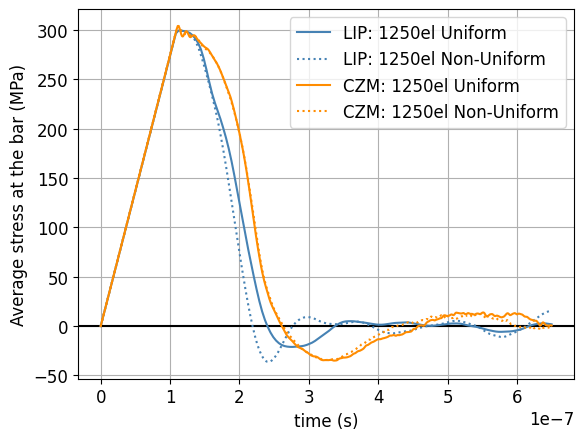

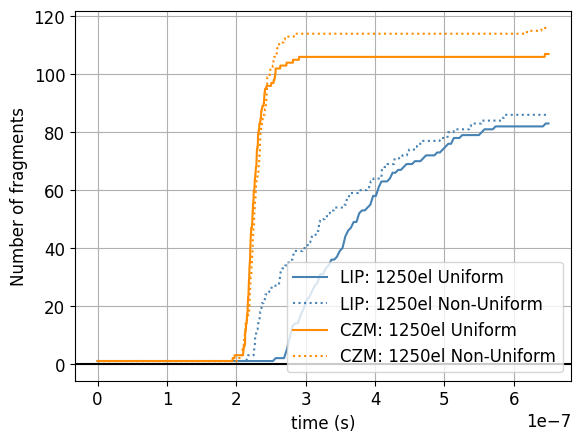

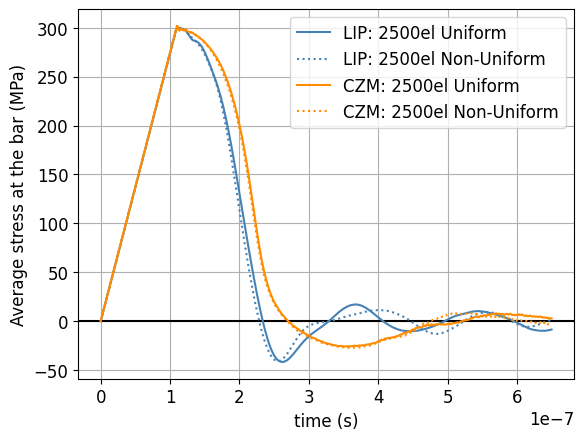

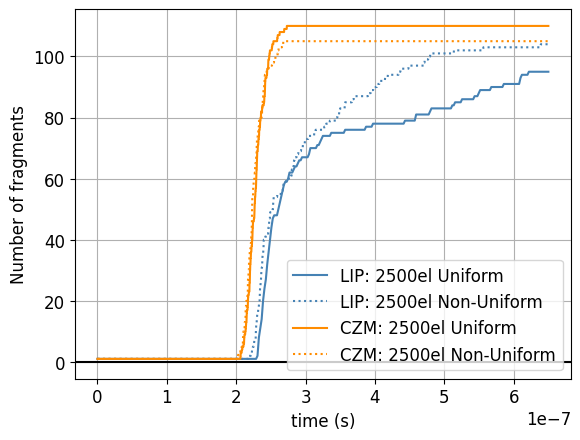

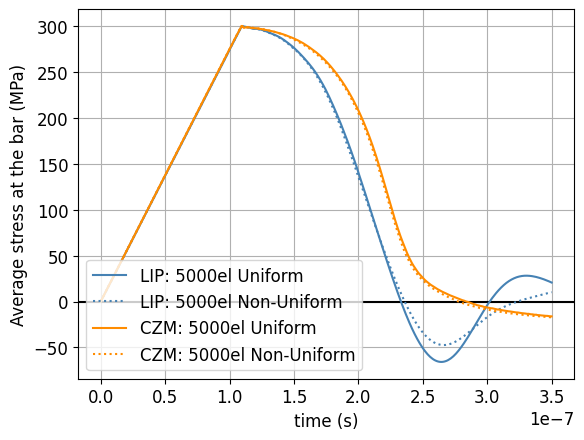

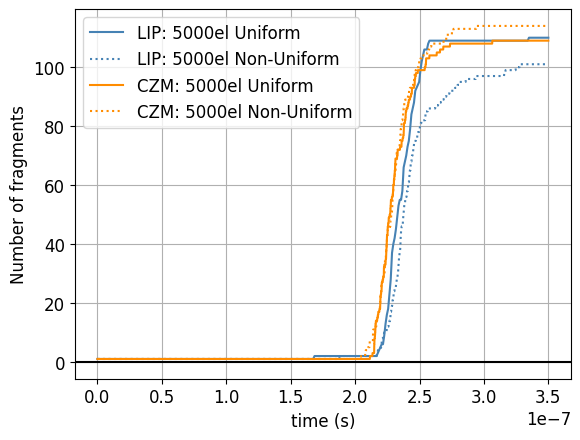

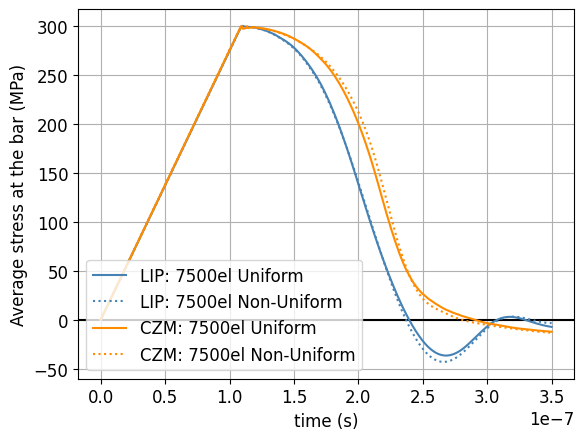

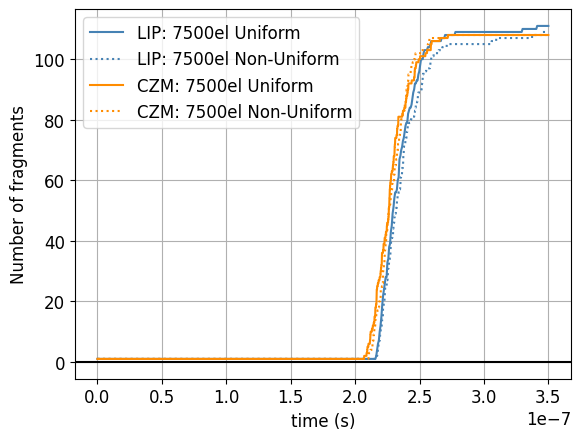

In [26]:
def plotCompareCZMLIP(results, title, label_x, label_y, save_filename):

    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    # plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.rcParams.update({'font.size': 12})


    name_simulation = results[0][0]
    x_values = results[0][1]
    y_values = results[0][2]
    plt.plot(x_values, y_values, label=name_simulation, color='steelblue')
    name_simulation = results[1][0]
    x_values = results[1][1]
    y_values = results[1][2]
    plt.plot(x_values, y_values, label=name_simulation, color='steelblue',  linestyle = 'dotted')
    name_simulation = results[2][0]
    x_values = results[2][1]
    y_values = results[2][2]
    plt.plot(x_values, y_values, label=name_simulation, color='darkorange')
    name_simulation = results[3][0]
    x_values = results[3][1]
    y_values = results[3][2]
    plt.plot(x_values, y_values, label=name_simulation, color='darkorange',  linestyle = 'dotted')

    plt.legend()
    plt.savefig(save_filename)
    plt.show()

# 1250 elements

stress_bar = [
    ["LIP: 1250el Uniform", lip_time_uniform_1250el, lip_avg_stress_bar_uniform_1250el/10**6],
    ["LIP: 1250el Non-Uniform", lip_time_non_uniform_1250el, lip_avg_stress_bar_non_uniform_1250el/10**6],
    ["CZM: 1250el Uniform", aka_time_uniform_1250el, aka_avg_stress_bar_uniform_1250el/10**6],
    ["CZM: 1250el Non-Uniform", aka_time_non_uniform_1250el, aka_avg_stress_bar_non_uniform_1250el/10**6],
]


plotCompareCZMLIP(
    stress_bar,
    title="Uniform x Non-Uniform 1250 elements: Average stress",
    label_x="time (s)",
    label_y="Average stress at the bar (MPa)",
    save_filename="LOG/mesh_study/plots/1250el_avg_stress.svg",
)

nfrag = [
    ["LIP: 1250el Uniform", lip_time_uniform_1250el, lip_n_fragments_uniform_1250el],
    ["LIP: 1250el Non-Uniform", lip_time_non_uniform_1250el, lip_n_fragments_non_uniform_1250el],
    ["CZM: 1250el Uniform", aka_time_uniform_1250el, aka_n_fragments_uniform_1250el],
    ["CZM: 1250el Non-Uniform", aka_time_non_uniform_1250el, aka_n_fragments_non_uniform_1250el],
]
plotCompareCZMLIP(
    nfrag,
    title="Uniform x Non-Uniform 1250 elements: Number of fragments",
    label_x="time (s)",
    label_y="Number of fragments",
    save_filename="LOG/mesh_study/plots/1250el_n_fragments.svg",
)


# 2500 elements

stress_bar = [
    ["LIP: 2500el Uniform", lip_time_uniform_2500el, lip_avg_stress_bar_uniform_2500el/10**6],
    ["LIP: 2500el Non-Uniform", lip_time_non_uniform_2500el, lip_avg_stress_bar_non_uniform_2500el/10**6],
    ["CZM: 2500el Uniform", aka_time_uniform_2500el, aka_avg_stress_bar_uniform_2500el/10**6],
    ["CZM: 2500el Non-Uniform", aka_time_non_uniform_2500el, aka_avg_stress_bar_non_uniform_2500el/10**6],
]


plotCompareCZMLIP(
    stress_bar,
    title="Uniform x Non-Uniform 2500 elements: Average stress",
    label_x="time (s)",
    label_y="Average stress at the bar (MPa)",
    save_filename="LOG/mesh_study/plots/2500el_avg_stress.svg",
)

nfrag = [
    ["LIP: 2500el Uniform", lip_time_uniform_2500el, lip_n_fragments_uniform_2500el],
    ["LIP: 2500el Non-Uniform", lip_time_non_uniform_2500el, lip_n_fragments_non_uniform_2500el],
    ["CZM: 2500el Uniform", aka_time_uniform_2500el, aka_n_fragments_uniform_2500el],
    ["CZM: 2500el Non-Uniform", aka_time_non_uniform_2500el, aka_n_fragments_non_uniform_2500el],
]
plotCompareCZMLIP(
    nfrag,
    title="Uniform x Non-Uniform 2500 elements: Number of fragments",
    label_x="time (s)",
    label_y="Number of fragments",
    save_filename="LOG/mesh_study/plots/2500el_n_fragments.svg",
)


# 5000 elements

stress_bar = [
    ["LIP: 5000el Uniform", lip_time_uniform_5000el, lip_avg_stress_bar_uniform_5000el/10**6],
    ["LIP: 5000el Non-Uniform", lip_time_non_uniform_5000el, lip_avg_stress_bar_non_uniform_5000el/10**6],
    ["CZM: 5000el Uniform", aka_time_uniform_5000el, aka_avg_stress_bar_uniform_5000el/10**6],
    ["CZM: 5000el Non-Uniform", aka_time_non_uniform_5000el, aka_avg_stress_bar_non_uniform_5000el/10**6],
]


plotCompareCZMLIP(
    stress_bar,
    title="Uniform x Non-Uniform 5000 elements: Average stress",
    label_x="time (s)",
    label_y="Average stress at the bar (MPa)",
    save_filename="LOG/mesh_study/plots/5000el_avg_stress.svg",
)

nfrag = [
    ["LIP: 5000el Uniform", lip_time_uniform_5000el, lip_n_fragments_uniform_5000el],
    ["LIP: 5000el Non-Uniform", lip_time_non_uniform_5000el, lip_n_fragments_non_uniform_5000el],
    ["CZM: 5000el Uniform", aka_time_uniform_5000el, aka_n_fragments_uniform_5000el],
    ["CZM: 5000el Non-Uniform", aka_time_non_uniform_5000el, aka_n_fragments_non_uniform_5000el],
]
plotCompareCZMLIP(
    nfrag,
    title="Uniform x Non-Uniform 5000 elements: Number of fragments",
    label_x="time (s)",
    label_y="Number of fragments",
    save_filename="LOG/mesh_study/plots/5000el_n_fragments.svg",
)


# 7500 elements

stress_bar = [
    ["LIP: 7500el Uniform", lip_time_uniform_7500el, lip_avg_stress_bar_uniform_7500el/10**6],
    ["LIP: 7500el Non-Uniform", lip_time_non_uniform_7500el, lip_avg_stress_bar_non_uniform_7500el/10**6],
    ["CZM: 7500el Uniform", aka_time_uniform_7500el, aka_avg_stress_bar_uniform_7500el/10**6],
    ["CZM: 7500el Non-Uniform", aka_time_non_uniform_7500el, aka_avg_stress_bar_non_uniform_7500el/10**6],
]


plotCompareCZMLIP(
    stress_bar,
    title="Uniform x Non-Uniform 7500 elements: Average stress",
    label_x="time (s)",
    label_y="Average stress at the bar (MPa)",
    save_filename="LOG/mesh_study/plots/7500el_avg_stress.svg",
)

nfrag = [
    ["LIP: 7500el Uniform", lip_time_uniform_7500el, lip_n_fragments_uniform_7500el],
    ["LIP: 7500el Non-Uniform", lip_time_non_uniform_7500el, lip_n_fragments_non_uniform_7500el],
    ["CZM: 7500el Uniform", aka_time_uniform_7500el, aka_n_fragments_uniform_7500el],
    ["CZM: 7500el Non-Uniform", aka_time_non_uniform_7500el, aka_n_fragments_non_uniform_7500el],
]
plotCompareCZMLIP(
    nfrag,
    title="Uniform x Non-Uniform 7500 elements: Number of fragments",
    label_x="time (s)",
    label_y="Number of fragments",
    save_filename="LOG/mesh_study/plots/7500el_n_fragments.svg",
)



### Convergence

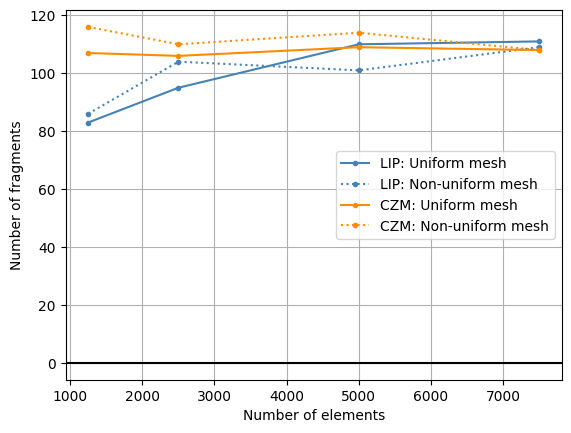

In [97]:
meshes = [1250, 2500, 5000, 7500]
lip_nfrag_uniform = [
    ["1250 elements", lip_time_uniform_1250el, lip_n_fragments_uniform_1250el],
    ["2500 elements", lip_time_uniform_2500el, lip_n_fragments_uniform_2500el],
    ["5000 elements", lip_time_uniform_5000el, lip_n_fragments_uniform_5000el],
    ["7500 elements", lip_time_uniform_7500el, lip_n_fragments_uniform_7500el],
]
lip_nfrag_non_uniform =[
    ["1250 elements", lip_time_non_uniform_1250el, lip_n_fragments_non_uniform_1250el],
    ["2500 elements", lip_time_non_uniform_2500el, lip_n_fragments_non_uniform_2500el],
    ["5000 elements", lip_time_non_uniform_5000el, lip_n_fragments_non_uniform_5000el],
    ["7500 elements", lip_time_non_uniform_7500el, lip_n_fragments_non_uniform_7500el],
    
]
aka_nfrag_uniform = [
    ["1250 elements", aka_time_uniform_1250el, aka_n_fragments_uniform_1250el],
    ["2500 elements", aka_time_uniform_2500el, aka_n_fragments_uniform_2500el],
    ["5000 elements", aka_time_uniform_5000el, aka_n_fragments_uniform_5000el],
    ["7500 elements", aka_time_uniform_7500el, aka_n_fragments_uniform_7500el],
]
aka_nfrag_non_uniform =[
    ["1250 elements", aka_time_non_uniform_1250el, aka_n_fragments_non_uniform_1250el],
    ["2500 elements", aka_time_non_uniform_2500el, aka_n_fragments_non_uniform_2500el],
    ["5000 elements", aka_time_non_uniform_5000el, aka_n_fragments_non_uniform_5000el],
    ["7500 elements", aka_time_non_uniform_7500el, aka_n_fragments_non_uniform_7500el],
]



def plotConvergenceCZMLIP(results0, results1, results2, results3,  meshes, title, label_x, label_y, save_filename):

    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    # plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    nb_simulations = len(meshes)
    x_values = np.zeros(nb_simulations)
    final_values0 = np.zeros(nb_simulations)
    final_values1 = np.zeros(nb_simulations)
    final_values2 = np.zeros(nb_simulations)
    final_values3 = np.zeros(nb_simulations)

    for i in range(nb_simulations):
        x_values[i] = meshes[i]
        final_values0[i] = max(results0[i][2])
        final_values1[i] = max(results1[i][2])
        final_values2[i] = max(results2[i][2])
        final_values3[i] = max(results3[i][2])
    plt.plot(x_values, final_values0, marker='.',label='LIP: Uniform mesh', color='steelblue')
    plt.plot(x_values, final_values1, marker='.',label="LIP: Non-uniform mesh", color='steelblue', linestyle='dotted')
    plt.plot(x_values, final_values2, marker='.',label="CZM: Uniform mesh", color='darkorange')
    plt.plot(x_values, final_values3, marker='.',label="CZM: Non-uniform mesh", color='darkorange', linestyle='dotted')

    plt.legend()
    plt.savefig(save_filename)
    plt.show()


plotConvergenceCZMLIP(
    lip_nfrag_uniform, 
    lip_nfrag_non_uniform, 
    aka_nfrag_uniform, 
    aka_nfrag_non_uniform, 
    meshes, 
    title="Uniform x Non-Uniform mesh CZM: number fragments convergence", 
    label_x="Number of elements",
    label_y="Number of fragments", 
    save_filename="LOG/mesh_study/plots/mesh_convergence.pdf")


### Energy

In [98]:

def getEnergy(energies, energy_name):

    for i in range(len(energies)):
        if energies[i][0] == energy_name:
            energy = energies[i][1]
            return energy

def computeVarEnergiesCZM(energies, n_steps, n_elements):
    """Returns the variation of energies between the current time step and the time step 0."""

    energy_potential = np.zeros(n_steps)
    energy_kinetic = np.zeros(n_steps)
    energy_dissipated = np.zeros(n_steps)
    energy_contact = np.zeros(n_steps)
    energy_reversible = np.zeros(n_steps)
    energy_total = np.zeros(n_steps)
    external_work = np.zeros(n_steps)
    
    var_energy_potential = np.zeros(n_steps)
    var_energy_kinetic = np.zeros(n_steps)
    var_energy_dissipated = np.zeros(n_steps)
    var_energy_contact = np.zeros(n_steps)
    var_energy_reversible = np.zeros(n_steps)
    var_energy_total = np.zeros(n_steps)
    var_external_work = np.zeros(n_steps)

    h = 50*10**-3 / n_elements
    for i in range(n_steps):

        energy_potential[i] = getEnergy(energies[i], "energy potential") / h
        energy_kinetic[i] = getEnergy(energies[i], "energy kinetic") / h
        energy_dissipated[i] = getEnergy(energies[i], "energy dissipated") / h
        energy_reversible[i] = getEnergy(energies[i], "energy reversible") / h
        energy_contact[i] = getEnergy(energies[i], "energy contact") / h
        external_work[i] = getEnergy(energies[i], "external work") / h

    for n in range(1, n_steps):
        var_energy_potential[n] = energy_potential[n] - energy_potential[0]
        var_energy_kinetic[n] = energy_kinetic[n] - energy_kinetic[0]
        var_energy_dissipated[n] = energy_dissipated[n] - energy_dissipated[0]
        var_energy_reversible[n] = energy_reversible[n] - energy_reversible[0]
        var_energy_contact[n] = energy_contact[n] - energy_contact[0]
        var_external_work[n] = external_work[n] - external_work[0]
        var_energy_total[n] = var_external_work[n] - (
            var_energy_potential[n]
            + var_energy_kinetic[n]
            + var_energy_dissipated[n]
            + var_energy_reversible[n]
            + var_energy_contact[n]
        )

    var_energies = [
        ["var energy potential", var_energy_potential],
        ["var energy kinetic", var_energy_kinetic],
        ["var energy dissipated", var_energy_dissipated],
        ["var energy reversible", var_energy_reversible],
        ["var energy contact", var_energy_contact],
        ["var external work", var_external_work],
        ["var energy total", var_energy_total],
    ]

    return var_energies


def computeVarEnergiesLipfield(energies, n_steps):
    """Returns the variation of energies between the current time step and the time step 0."""

    energy_potential = np.zeros(n_steps)
    energy_kinetic = np.zeros(n_steps)
    energy_dissipated = np.zeros(n_steps)
    external_work = np.zeros(n_steps)
    
    var_energy_potential = np.zeros(n_steps)
    var_energy_kinetic = np.zeros(n_steps)
    var_energy_dissipated = np.zeros(n_steps)
    var_external_work = np.zeros(n_steps)
    var_energy_total = np.zeros(n_steps)

    for i in range(n_steps):
        energy_potential[i] = getEnergy(energies[i], "energy potential")
        energy_kinetic[i] = getEnergy(energies[i], "energy kinetic")
        energy_dissipated[i] = getEnergy(energies[i], "energy dissipated")
        external_work[i] = getEnergy(energies[i], "external work")

    for n in range(1, n_steps):
        var_energy_potential[n] = energy_potential[n] - energy_potential[0]
        var_energy_kinetic[n] = energy_kinetic[n] - energy_kinetic[0]
        var_energy_dissipated[n] = energy_dissipated[n] - energy_dissipated[0]
        var_external_work[n] = external_work[n] - external_work[0]
        var_energy_total[n] = var_external_work[n] - (
            var_energy_potential[n] + var_energy_kinetic[n] + var_energy_dissipated[n]
        )

    var_energies = [
        ["var energy potential", var_energy_potential],
        ["var energy kinetic", var_energy_kinetic],
        ["var energy dissipated", var_energy_dissipated],
        ["var external work", var_external_work],
        ["var energy total", var_energy_total],
    ]

    return var_energies


        
def plotVarEnergiesCZM(var_energies, time, save_filename, title):
    """Plot variation of energy from time t to t0."""

    var_energy_potential = getEnergy(var_energies, "var energy potential") / 10**3
    var_energy_kinetic = getEnergy(var_energies, "var energy kinetic") / 10**3
    var_energy_dissipated = getEnergy(
        var_energies, "var energy dissipated"
    ) / 10**3
    var_energy_reversible = getEnergy(
        var_energies, "var energy reversible"
    ) / 10**3
    var_energy_contact = getEnergy(var_energies, "var energy contact") / 10**3
    var_external_work = getEnergy(var_energies, "var external work") / 10**3
    var_energy_total = getEnergy(var_energies, "var energy total") / 10**3

    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    # plt.title(title)
    plt.xlabel(str("Time (s)"))
    plt.ylabel("Variation of energy ($ kJ/ {m^2} $)")
    plt.ylim(-30,20)
    plt.xlim(0, 3.5*10**-7)

    x = time 

    plt.plot(x, var_energy_potential, label="varEpot")
    plt.plot(x, var_energy_kinetic, label="varEkin")
    plt.plot(x, var_energy_dissipated, label="varEdis")
    plt.plot(x, var_energy_reversible, label="varErev")
    plt.plot(x, var_energy_contact, label="varEcon")
    plt.plot(x, -var_external_work, label="-varWext")
    plt.plot(x, var_energy_total, label="varEtot")
    plt.legend()
    plt.savefig(save_filename)
    plt.show()


def plotVarEnergiesLipfield(var_energies, time, save_filename, title):
    """Plot variation of energy from time t to t0."""

    var_energy_potential = getEnergy(var_energies, "var energy potential") / 10**3
    var_energy_kinetic = getEnergy(var_energies, "var energy kinetic") / 10**3
    var_energy_dissipated = getEnergy(
        var_energies, "var energy dissipated"
    ) / 10**3
    var_external_work = getEnergy(var_energies, "var external work")/ 10**3
    var_energy_total = getEnergy(var_energies, "var energy total")/ 10**3

    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    # plt.title(str(title))
    plt.xlabel(str("Time (s)"))
    plt.ylabel("Variation of energy ($ kJ/ {m^2} $)")
    plt.ylim(-30,20)
    plt.xlim(0, 3.5*10**-7)

    x = time

    plt.plot(x, var_energy_potential, label="varEpot")
    plt.plot(x, var_energy_kinetic, label="varEkin")
    plt.plot(x, var_energy_dissipated, label="varEdis")
    plt.plot(x, -var_external_work, label="-varWext", color='saddlebrown')
    plt.plot(x, var_energy_total, label="varEtot", color='orchid' )
    plt.legend()
    plt.savefig(save_filename)
    plt.show()


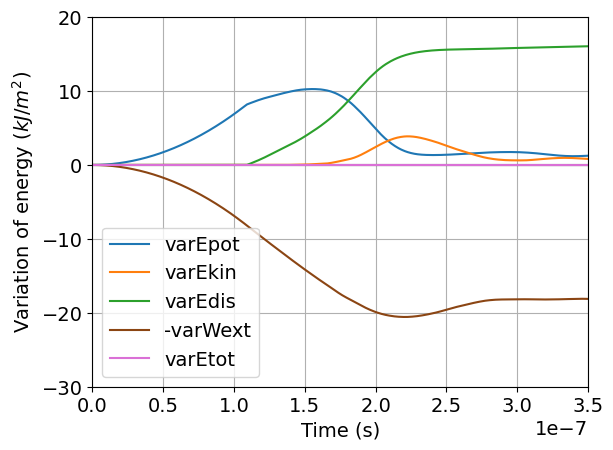

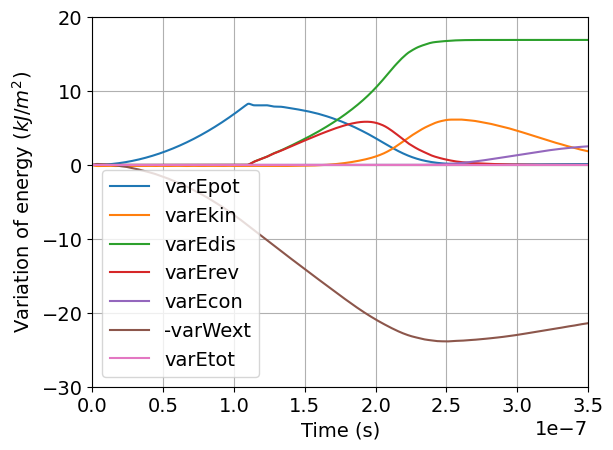

In [99]:
# Uniform 1250 el
# lip_var_energies_uniform_1250el = computeVarEnergiesLipfield(
#     lip_energies_uniform_1250el, lip_size_uniform_1250el
# )
# plotVarEnergiesLipfield(
#     lip_var_energies_uniform_1250el,
#     lip_time_uniform_1250el,
#     "LOG/mesh_study/plots/lip_var_energy_uniform_1250el.svg",
#     title="LIP: Variation of energy 1250 Uniform"
# )
# # Non-Uniform 1250 el
# lip_var_energies_non_uniform_1250el = computeVarEnergiesLipfield(
#     lip_energies_non_uniform_1250el, lip_size_non_uniform_1250el
# )
# plotVarEnergiesLipfield(
#     lip_var_energies_non_uniform_1250el,
#     lip_time_non_uniform_1250el,
#     "LOG/mesh_study/plots/lip_var_energy_non_uniform_1250el.svg",
#     title="LIP: Variation of energy 1250 Non-Uniform"
# )
# # Uniform 2500 el
# lip_var_energies_uniform_2500el = computeVarEnergiesLipfield(
#     lip_energies_uniform_2500el, lip_size_uniform_2500el
# )
# plotVarEnergiesLipfield(
#     lip_var_energies_uniform_2500el,
#     lip_time_uniform_2500el,
#     "LOG/mesh_study/plots/lip_var_energy_uniform_2500el.svg",
#     title="LIP: Variation of energy 2500 Uniform"
# )
# Non-Uniform 2500 el
lip_var_energies_non_uniform_2500el = computeVarEnergiesLipfield(
    lip_energies_non_uniform_2500el, lip_size_non_uniform_2500el
)
plotVarEnergiesLipfield(
    lip_var_energies_non_uniform_2500el,
    lip_time_non_uniform_2500el,
    "LOG/mesh_study/plots/lip_var_energy_non_uniform_2500el.pdf",
    title="LIP: Variation of energy 2500 Non-Uniform"
)
# # Uniform 5000 el
# lip_var_energies_uniform_5000el = computeVarEnergiesLipfield(
#     lip_energies_uniform_5000el, lip_size_uniform_5000el
# )
# plotVarEnergiesLipfield(
#     lip_var_energies_uniform_5000el,
#     lip_time_uniform_5000el,
#     "LOG/mesh_study/plots/lip_var_energy_uniform_5000el.svg",
#     title="LIP: Variation of energy 5000 Uniform"
# )
# # Non-Uniform 5000 el
# lip_var_energies_non_uniform_5000el = computeVarEnergiesLipfield(
#     lip_energies_non_uniform_5000el, lip_size_non_uniform_5000el
# )
# plotVarEnergiesLipfield(
#     lip_var_energies_non_uniform_5000el,
#     lip_time_non_uniform_5000el,
#     "LOG/mesh_study/plots/lip_var_energy_non_uniform_5000el.svg",
#     title="LIP: Variation of energy 5000 Non-Uniform"
# )
# # Uniform 7500 el
# lip_var_energies_uniform_7500el = computeVarEnergiesLipfield(
#     lip_energies_uniform_7500el, lip_size_uniform_7500el
# )
# plotVarEnergiesLipfield(
#     lip_var_energies_uniform_7500el,
#     lip_time_uniform_7500el,
#     "LOG/mesh_study/plots/lip_var_energy_uniform_7500el.svg",
#     title="LIP: Variation of energy 7500 Uniform"
# )
# # Non-Uniform 7500 el
# lip_var_energies_non_uniform_7500el = computeVarEnergiesLipfield(
#     lip_energies_non_uniform_7500el, lip_size_non_uniform_7500el
# )
# plotVarEnergiesLipfield(
#     lip_var_energies_non_uniform_7500el,
#     lip_time_non_uniform_7500el,
#     "LOG/mesh_study/plots/lip_var_energy_non_uniform_7500el.svg",
#     title="LIP: Variation of energy 7500 Non-Uniform"
# )

# # Uniform 1250 el
# aka_var_energies_uniform_1250el = computeVarEnergiesCZM(
#     aka_energies_uniform_1250el, aka_size_uniform_1250el, 1250
# )
# plotVarEnergiesCZM(
#     aka_var_energies_uniform_1250el,
#     aka_time_uniform_1250el,
#     "LOG/mesh_study/plots/czm_var_energy_uniform_1250el.svg",
#     title="CZM: Variation of energy 1250 Uniform"
# )
# # Non-Uniform 1250 el
# aka_var_energies_non_uniform_1250el = computeVarEnergiesCZM(
#     aka_energies_non_uniform_1250el, aka_size_non_uniform_1250el, 1250,
    
# )
# plotVarEnergiesCZM(
#     aka_var_energies_non_uniform_1250el,
#     aka_time_non_uniform_1250el,
#     "LOG/mesh_study/plots/czm_var_energy_non_uniform_1250el.svg",
#     title="CZM: Variation of energy 1250 Non-Uniform"
# )
# # Uniform 2500 el
# aka_var_energies_uniform_2500el = computeVarEnergiesCZM(
#     aka_energies_uniform_2500el, aka_size_uniform_2500el, 2500
# )
# plotVarEnergiesCZM(
#     aka_var_energies_uniform_2500el,
#     aka_time_uniform_2500el,
#     "LOG/mesh_study/plots/czm_var_energy_uniform_2500el.svg",
#     title="CZM: Variation of energy 2500 Uniform"
# )
# Non-Uniform 2500 el
aka_var_energies_non_uniform_2500el = computeVarEnergiesCZM(
    aka_energies_non_uniform_2500el, aka_size_non_uniform_2500el, 2500
)
plotVarEnergiesCZM(
    aka_var_energies_non_uniform_2500el,
    aka_time_non_uniform_2500el,
    "LOG/mesh_study/plots/czm_var_energy_non_uniform_2500el.pdf",
    title="CZM: Variation of energy 2500 Non-Uniform"
)
# # Uniform 5000 el
# aka_var_energies_uniform_5000el = computeVarEnergiesCZM(
#     aka_energies_uniform_5000el, aka_size_uniform_5000el, 5000
# )
# plotVarEnergiesCZM(
#     aka_var_energies_uniform_5000el,
#     aka_time_uniform_5000el,
#     "LOG/mesh_study/plots/czm_var_energy_uniform_5000el.svg",
#     title="CZM: Variation of energy 5000 Uniform"
# )
# # Non-Uniform 5000 el
# aka_var_energies_non_uniform_5000el = computeVarEnergiesCZM(
#     aka_energies_non_uniform_5000el, aka_size_non_uniform_5000el, 5000
# )
# plotVarEnergiesCZM(
#     aka_var_energies_non_uniform_5000el,
#     aka_time_non_uniform_5000el,
#     "LOG/mesh_study/plots/czm_var_energy_non_uniform_5000el.svg",
#     title="CZM: Variation of energy 5000 Non-Uniform"
# )
# # Uniform 7500 el
# aka_var_energies_uniform_7500el = computeVarEnergiesCZM(
#     aka_energies_uniform_7500el, aka_size_uniform_7500el, 7500
# )
# plotVarEnergiesCZM(
#     aka_var_energies_uniform_7500el,
#     aka_time_uniform_7500el,
#     "LOG/mesh_study/plots/czm_var_energy_uniform_7500el.svg",
#     title="CZM: Variation of energy 7500 Uniform"
# )
# # Non-Uniform 7500 el
# aka_var_energies_non_uniform_7500el = computeVarEnergiesCZM(
#     aka_energies_non_uniform_7500el, aka_size_non_uniform_7500el, 7500
# )
# plotVarEnergiesCZM(
#     aka_var_energies_non_uniform_7500el,
#     aka_time_non_uniform_7500el,
#     "LOG/mesh_study/plots/czm_var_energy_non_uniform_7500el.svg",
#     title="CZM: Variation of energy 7500 Non-Uniform")

### Fragment lengths

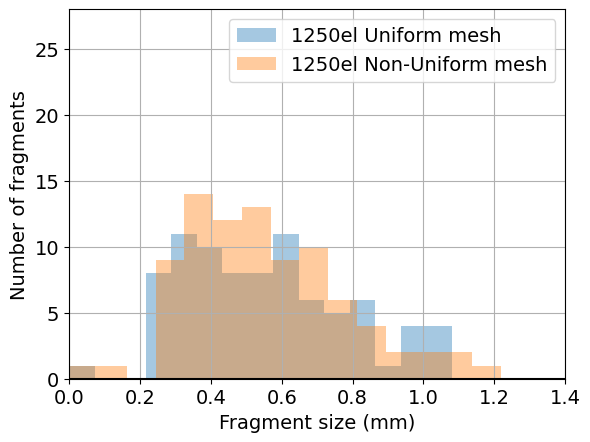

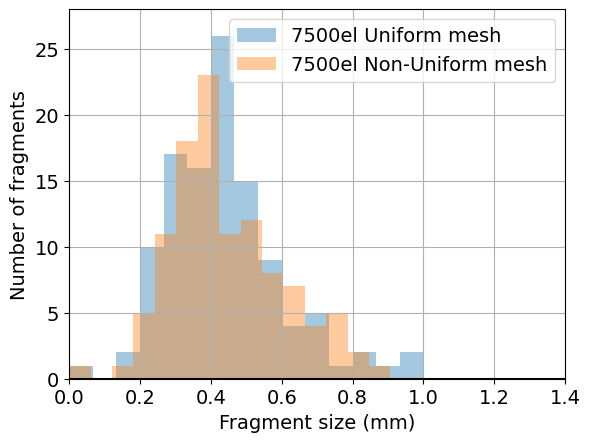

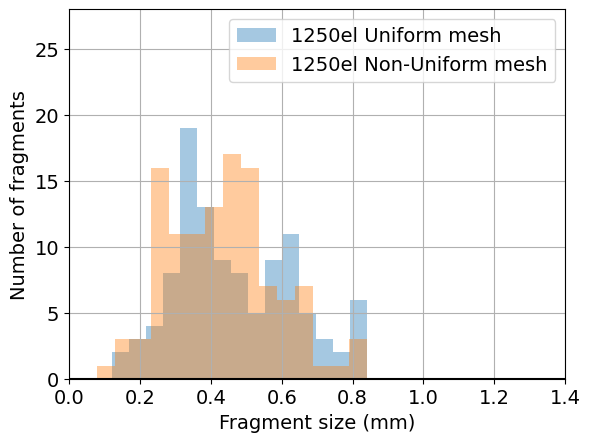

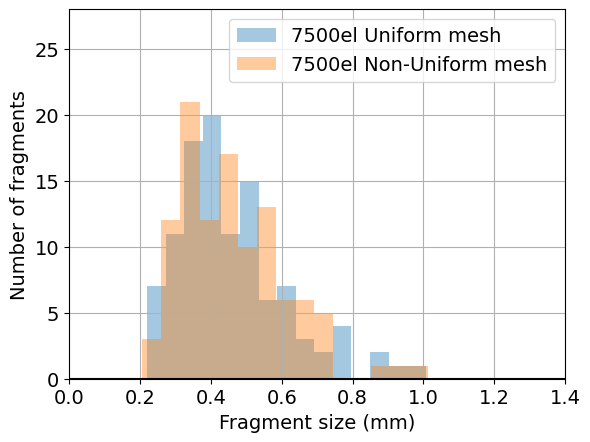

In [39]:
def plotCompareFragmentSizeHistogram(frag_sizes_un, frag_sizes_nun, n_el, title, filename):

    hfont = {"fontname": "sans-serif"}
    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    # plt.title("Fragment size distribution", **hfont)
    plt.xlabel("Fragment size (mm)", **hfont)
    plt.ylabel("Number of fragments", **hfont)
    # plt.title(title)
    plt.rcParams.update({"font.size": 14})
    plt.xlim(xmin=0, xmax = 1.4)
    plt.ylim(ymin=0, ymax = 28)

    plt.hist(
        frag_sizes_un * 10**3,
        15,
        histtype="stepfilled",
        alpha=0.4,
        label=str(n_el) + "el Uniform mesh",
    )
    plt.hist(
        frag_sizes_nun * 10**3,
        15,
        histtype="stepfilled",
        alpha=0.4,
        label=str(n_el)+"el Non-Uniform mesh",
    )
    plt.legend()
    plt.savefig(filename)
    plt.show()


# 1250 el
plotCompareFragmentSizeHistogram(
    lip_sfrag_uniform_1250el[lip_size_uniform_1250el - 1],
    lip_sfrag_non_uniform_1250el[lip_size_non_uniform_1250el - 1],
    1250,
    "LIP 1250 el: Fragment size distribution ",
    "LOG/mesh_study/plots/lip_1250_compare_fraglen.svg",
)
# 2500 el
# plotCompareFragmentSizeHistogram(
#     lip_sfrag_uniform_2500el[lip_size_uniform_2500el - 1],
#     lip_sfrag_non_uniform_2500el[lip_size_non_uniform_2500el - 1],
#     2500,
#     "LIP 2500 el: Fragment size distribution ",
#     "LOG/mesh_study/plots/lip_2500_compare_fraglen.svg",
# )
# # 5000 el
# plotCompareFragmentSizeHistogram(
#     lip_sfrag_uniform_5000el[lip_size_uniform_5000el - 1],
#     lip_sfrag_non_uniform_5000el[lip_size_non_uniform_5000el - 1],
#     5000,
#     "LIP 5000 el: Fragment size distribution ",
#     "LOG/mesh_study/plots/lip_5000_compare_fraglen.svg",
# )
# 7500 el
plotCompareFragmentSizeHistogram(
    lip_sfrag_uniform_7500el[lip_size_uniform_7500el - 1],
    lip_sfrag_non_uniform_7500el[lip_size_non_uniform_7500el - 1],
    7500,
    "LIP 7500 el: Fragment size distribution ",
    "LOG/mesh_study/plots/lip_7500_compare_fraglen.svg",
)
# 1250 el
h = 50 * 10**-3 / 1250 * 0.5
plotCompareFragmentSizeHistogram(
    aka_sfrag_uniform_1250el[aka_size_uniform_1250el - 1]*h,
    aka_sfrag_non_uniform_1250el[aka_size_non_uniform_1250el - 1]*h,
    1250,
    "CZM 1250 el: Fragment size distribution ",
    "LOG/mesh_study/plots/czm_1250_compare_fraglen.svg",
)
# # 2500 el
# h = 50 * 10**-3 / 2500 * 0.5
# plotCompareFragmentSizeHistogram(
#     aka_sfrag_uniform_2500el[aka_size_uniform_2500el - 1]*h,
#     aka_sfrag_non_uniform_2500el[aka_size_non_uniform_2500el - 1]*h,
#     2500,
#     "CZM 2500 el: Fragment size distribution ",
#     "LOG/mesh_study/plots/czm_2500_compare_fraglen.svg",
# )
# # 5000 el
# h = 50 * 10**-3 / 5000 * 0.5
# plotCompareFragmentSizeHistogram(
#     aka_sfrag_uniform_5000el[aka_size_uniform_5000el - 1]*h,
#     aka_sfrag_non_uniform_5000el[aka_size_non_uniform_5000el - 1]*h,
#     5000,
#     "CZM 5000 el: Fragment size distribution ",
#     "LOG/mesh_study/plots/czm_5000_compare_fraglen.svg",
# )
# 7500 el
h = 50 * 10**-3 / 7500 * 0.5
plotCompareFragmentSizeHistogram(
    aka_sfrag_uniform_7500el[aka_size_uniform_7500el - 1]*h,
    aka_sfrag_non_uniform_7500el[aka_size_non_uniform_7500el - 1]*h,
    7500,
    "CZM 7500 el: Fragment size distribution ",
    "LOG/mesh_study/plots/czm_7500_compare_fraglen.svg",
)

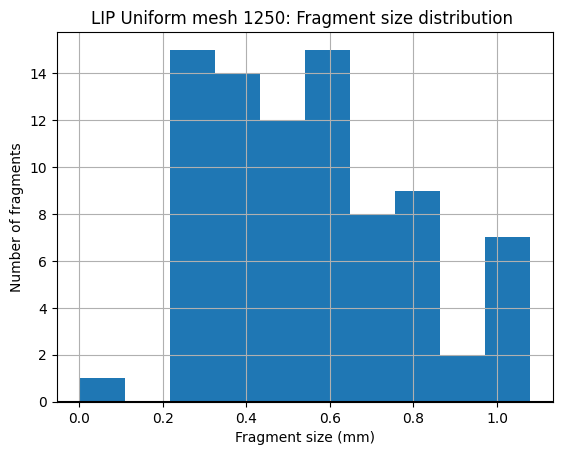

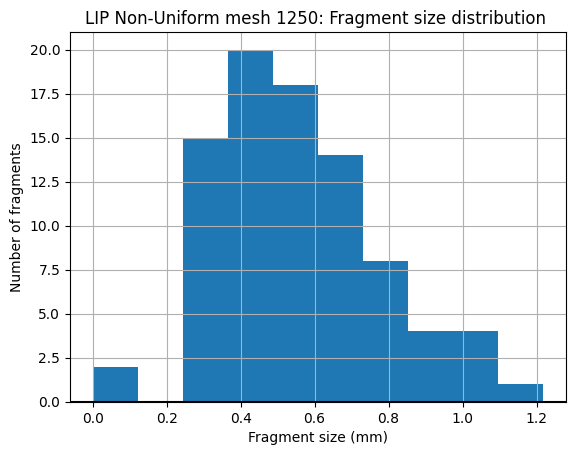

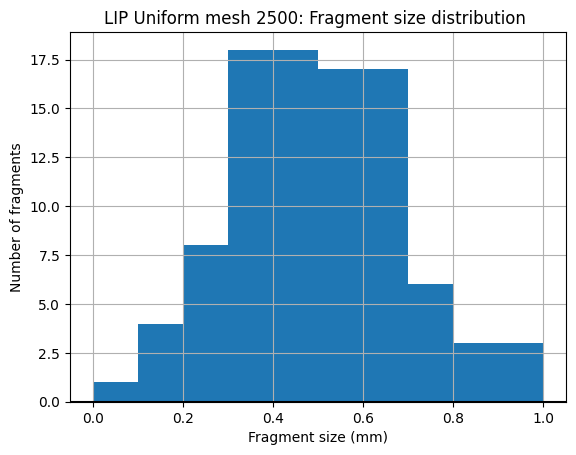

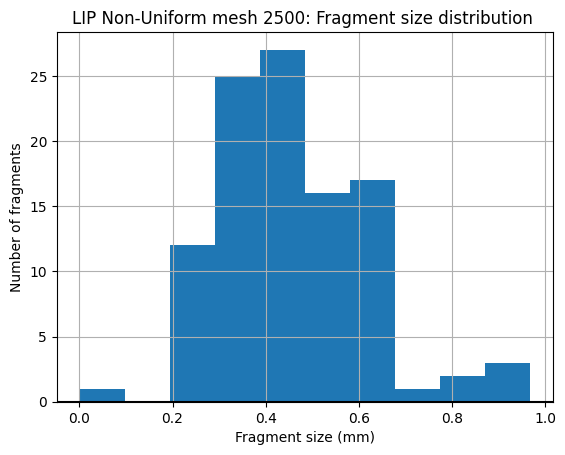

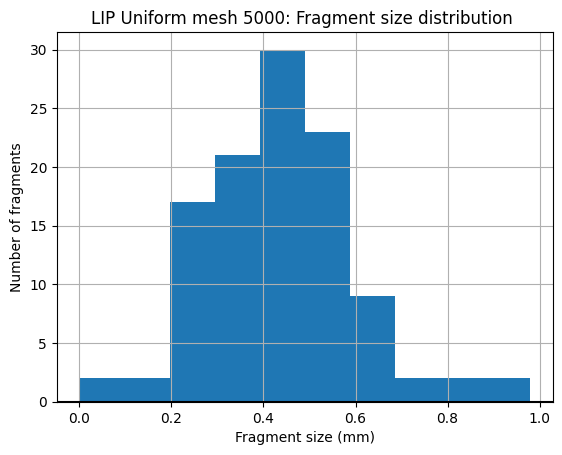

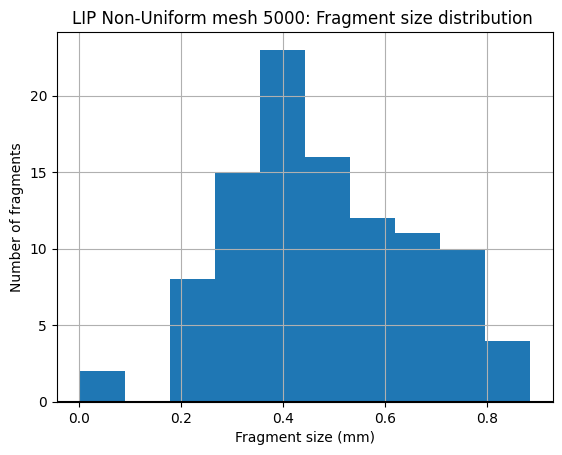

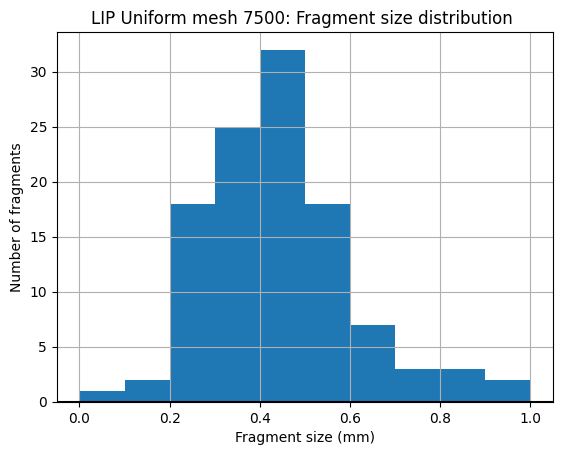

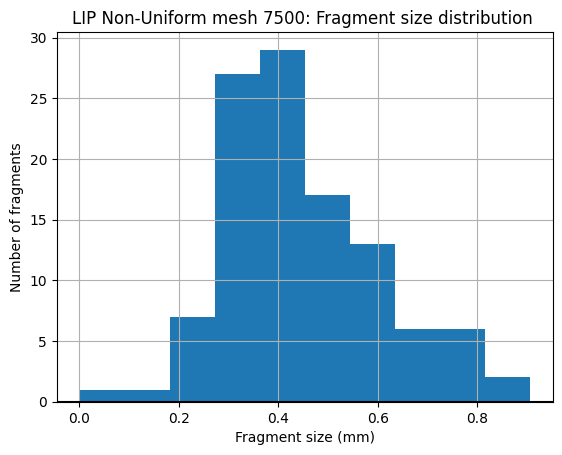

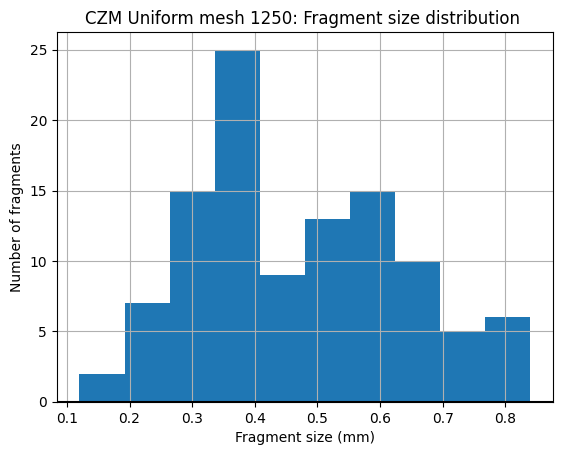

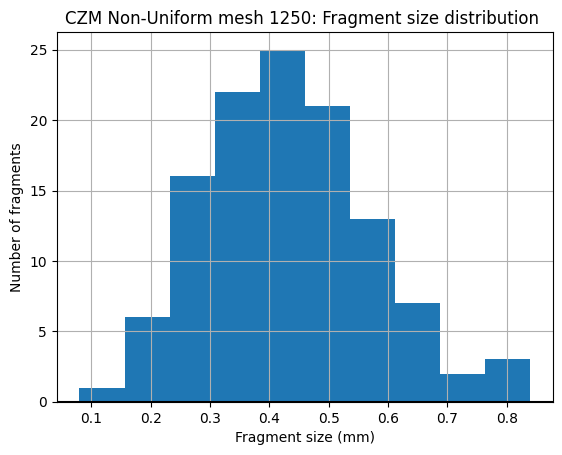

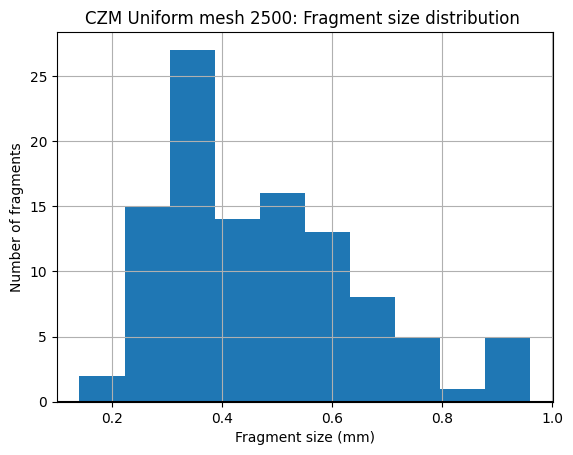

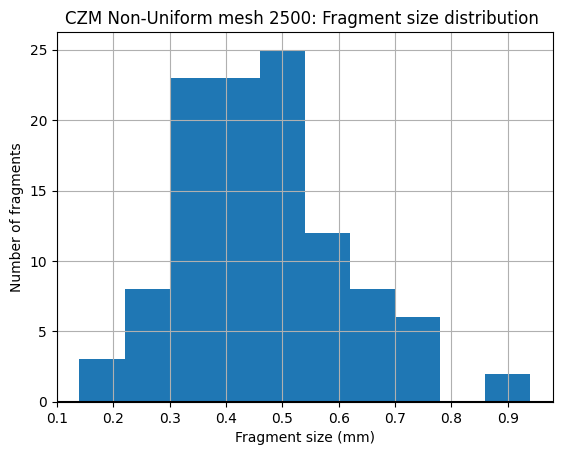

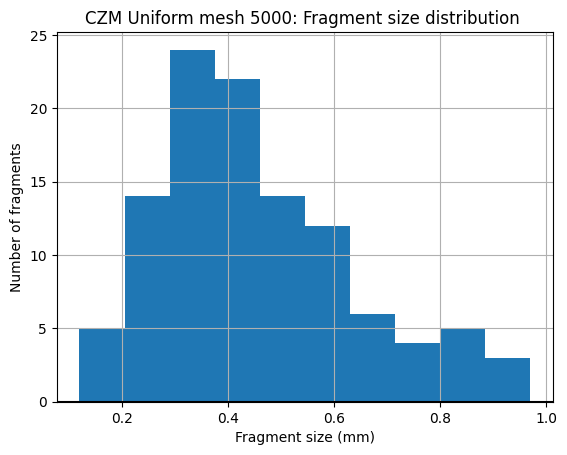

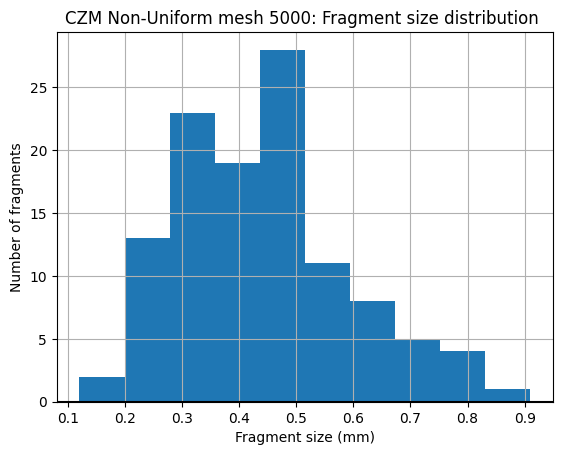

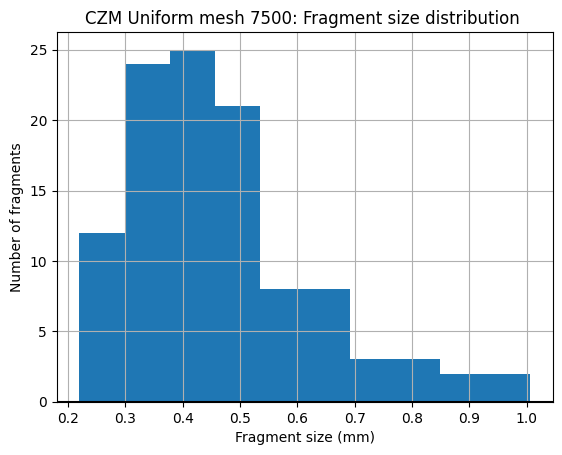

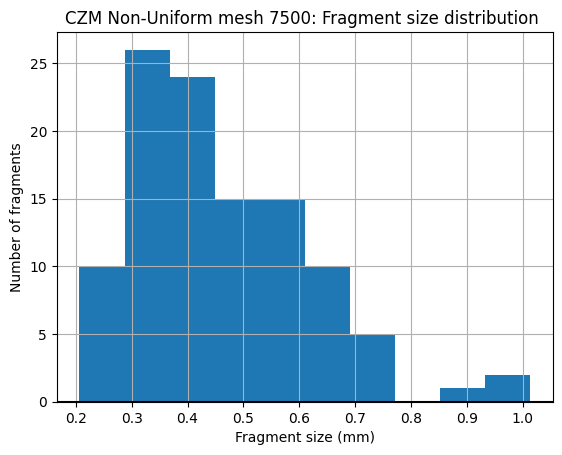

In [98]:
def plotFragmentSizeHistogram(frag_sizes, n_columns, title, filename_save):

    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    plt.title(title)
    plt.xlabel("Fragment size (mm)")
    plt.ylabel("Number of fragments")
    

    plt.hist(frag_sizes * 10**3, bins=n_columns)
    # plt.hist(frag_sizes)
    plt.savefig(filename_save)
    plt.show()


# Uniform 1250 el
plotFragmentSizeHistogram(
    lip_sfrag_uniform_1250el[lip_size_uniform_1250el - 1], 10, 
    "LIP Uniform mesh 1250: Fragment size distribution ",
    "LOG/mesh_study/plots/lip_frag_hist_uniform_1250el.svg"
)
# Non-Uniform 1250 el
plotFragmentSizeHistogram(
    lip_sfrag_non_uniform_1250el[lip_size_non_uniform_1250el - 1], 10, 
    "LIP Non-Uniform mesh 1250: Fragment size distribution ",
    "LOG/mesh_study/plots/lip_frag_hist_non_uniform_1250el.svg"
)
# Uniform 2500 el
plotFragmentSizeHistogram(
    lip_sfrag_uniform_2500el[lip_size_uniform_2500el - 1], 10, 
    "LIP Uniform mesh 2500: Fragment size distribution ",
    "LOG/mesh_study/plots/lip_frag_hist_uniform_2500el.svg"
)
# Non-Uniform 2500 el
plotFragmentSizeHistogram(
    lip_sfrag_non_uniform_2500el[lip_size_non_uniform_2500el - 1], 10,
    "LIP Non-Uniform mesh 2500: Fragment size distribution ",
    "LOG/mesh_study/plots/lip_frag_hist_non_uniform_2500el.svg"
)
# Uniform 5000 el
plotFragmentSizeHistogram(
    lip_sfrag_uniform_5000el[lip_size_uniform_5000el - 1], 10, 
    "LIP Uniform mesh 5000: Fragment size distribution ",
    "LOG/mesh_study/plots/lip_frag_hist_uniform_5000el.svg"
)
# Non-Uniform 5000 el
plotFragmentSizeHistogram(
    lip_sfrag_non_uniform_5000el[lip_size_non_uniform_5000el - 1], 10,
    "LIP Non-Uniform mesh 5000: Fragment size distribution ",
    "LOG/mesh_study/plots/lip_frag_hist_non_uniform_5000el.svg"
)

# Uniform 7500 el
plotFragmentSizeHistogram(
    lip_sfrag_uniform_7500el[lip_size_uniform_7500el - 1], 10, 
    "LIP Uniform mesh 7500: Fragment size distribution ",
    "LOG/mesh_study/plots/lip_frag_hist_uniform_7500el.svg"
)
# Non-Uniform 7500 el
plotFragmentSizeHistogram(
    lip_sfrag_non_uniform_7500el[lip_size_non_uniform_7500el - 1], 10,
    "LIP Non-Uniform mesh 7500: Fragment size distribution ",
    "LOG/mesh_study/plots/lip_frag_hist_non_uniform_7500el.svg"
)



# Uniform 1250 el
h = 50 * 10**-3 / 1250 * 0.5
plotFragmentSizeHistogram(
    aka_sfrag_uniform_1250el[aka_size_uniform_1250el - 1] * h,
    10,
    "CZM Uniform mesh 1250: Fragment size distribution ",
    "LOG/mesh_study/plots/czm_frag_hist_uniform_1250el.svg",
)
# Non-Uniform 1250 el
plotFragmentSizeHistogram(
    aka_sfrag_non_uniform_1250el[aka_size_non_uniform_1250el - 1] * h,
    10,
    "CZM Non-Uniform mesh 1250: Fragment size distribution ",
    "LOG/mesh_study/plots/czm_frag_hist_non_uniform_1250el.svg",
)
# Uniform 2500 el
h = 50 * 10**-3 / 2500 * 0.5
plotFragmentSizeHistogram(
    aka_sfrag_uniform_2500el[aka_size_uniform_2500el - 1] * h,
    10,
    "CZM Uniform mesh 2500: Fragment size distribution ",
    "LOG/mesh_study/plots/czm_frag_hist_uniform_2500el.svg",
)
# Non-Uniform 2500 el
plotFragmentSizeHistogram(
    aka_sfrag_non_uniform_2500el[aka_size_non_uniform_2500el - 1] * h,
    10,
    "CZM Non-Uniform mesh 2500: Fragment size distribution ",
    "LOG/mesh_study/plots/czm_frag_hist_non_uniform_2500el.svg",
)
# Uniform 5000 el
h = 50 * 10**-3 / 5000 * 0.5
plotFragmentSizeHistogram(
    aka_sfrag_uniform_5000el[aka_size_uniform_5000el - 1] * h,
    10,
    "CZM Uniform mesh 5000: Fragment size distribution ",
    "LOG/mesh_study/plots/czm_frag_hist_uniform_5000el.svg",
)
# Non-Uniform 5000 el
plotFragmentSizeHistogram(
    aka_sfrag_non_uniform_5000el[aka_size_non_uniform_5000el - 1] * h,
    10,
    "CZM Non-Uniform mesh 5000: Fragment size distribution ",
    "LOG/mesh_study/plots/czm_frag_hist_non_uniform_5000el.svg",
)
# Uniform 7500 el
h = 50 * 10**-3 / 7500 * 0.5
plotFragmentSizeHistogram(
    aka_sfrag_uniform_7500el[aka_size_uniform_7500el - 1] * h,
    10,
    "CZM Uniform mesh 7500: Fragment size distribution ",
    "LOG/mesh_study/plots/czm_frag_hist_uniform_7500el.svg",
)
# Non-Uniform 7500 el
plotFragmentSizeHistogram(
    aka_sfrag_non_uniform_7500el[aka_size_non_uniform_7500el - 1] * h,
    10,
    "CZM Non-Uniform mesh 7500: Fragment size distribution ",
    "LOG/mesh_study/plots/czm_frag_hist_non_uniform_7500el.svg",
)


### Different strain rates

In [102]:
# # 10to3
# filepath = "LOG/mesh_study/10to3_5000el_uniform/lipfield/"
# file_address = filepath + "lipfield_"
# lip_time_data_10to3 = readResultsVariable(file_address, "time_data")

# lip_time_simulation_10to3 = lip_time_data_10to3[0] 
# lip_dt_10to3 = lip_time_data_10to3[1]
# lip_n_steps_10to3 = int(lip_time_simulation_10to3/ lip_dt_10to3)

# lip_size_10to3 = int(lip_n_steps_10to3 / 10 +1)
# lip_n_fragments_10to3 = np.zeros(lip_size_10to3)
# lip_avg_stress_bar_10to3 = np.zeros(lip_size_10to3)
# lip_energies_10to3 = []
# lip_sfrag_10to3 = []
# i = 0
# for n in range(lip_n_steps_10to3):
#     if n%10 ==0:
#         lip_results_10to3 = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
#         lip_n_fragments_10to3[i] = getResults(lip_results_10to3, "n_fragments")
#         lip_avg_stress_bar_10to3[i] = getResults(lip_results_10to3, "avg_stress_bar")
#         lip_energies_10to3.append(getResults(lip_results_10to3, "energies"))
#         lip_sfrag_10to3.append(getResults(lip_results_10to3, "frag_lengths"))
#         i += 1

# # 10to3
# filepath = "LOG/mesh_study/10to3_5000el_uniform/czm/"
# file_address = filepath + "akantu_"
# aka_time_data_10to3 = readResultsVariable(filepath, "aka_time_data")

# aka_time_simulation_10to3 = aka_time_data_10to3[0] 
# aka_dt_10to3 = aka_time_data_10to3[1]
# aka_n_steps_10to3 = int(aka_time_simulation_10to3/ aka_dt_10to3)

# # n_steps_10to3 = time_data_10to3[2]
# aka_size_10to3 = int(aka_n_steps_10to3)
# aka_n_fragments_10to3 = np.zeros(aka_size_10to3)
# aka_avg_stress_bar_10to3 = np.zeros(aka_size_10to3)
# aka_energies_10to3 = []
# aka_sfrag_10to3 = []
# i = 0
# for n in range(aka_n_steps_10to3):
#     # if n%10 ==0:
#     aka_results_10to3 = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
#     aka_n_fragments_10to3[i] = getResults(aka_results_10to3, "n_fragments")
#     aka_avg_stress_bar_10to3[i] = getResults(aka_results_10to3, "avg_stress_bar")
#     aka_energies_10to3.append(getResults(aka_results_10to3, "energies"))
#     aka_sfrag_10to3.append(getResults(aka_results_10to3, "frag_lengths"))
#     i += 1
# 10to5
filepath = "LOG/mesh_study/10to5_5000el_uniform/lipfield/"
file_address = filepath + "lipfield_"
lip_time_data_10to5 = readResultsVariable(file_address, "time_data")

lip_time_simulation_10to5 = lip_time_data_10to5[0] 
lip_dt_10to5 = lip_time_data_10to5[1]
lip_n_steps_10to5 = int(lip_time_simulation_10to5/ lip_dt_10to5)

lip_size_10to5 = int(lip_n_steps_10to5 / 10 +1)
lip_n_fragments_10to5 = np.zeros(lip_size_10to5)
lip_avg_stress_bar_10to5 = np.zeros(lip_size_10to5)
lip_energies_10to5 = []
lip_sfrag_10to5 = []
i = 0
for n in range(lip_n_steps_10to5):
    if n%10 ==0:
        lip_results_10to5 = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        lip_n_fragments_10to5[i] = getResults(lip_results_10to5, "n_fragments")
        lip_avg_stress_bar_10to5[i] = getResults(lip_results_10to5, "avg_stress_bar")
        lip_energies_10to5.append(getResults(lip_results_10to5, "energies"))
        lip_sfrag_10to5.append(getResults(lip_results_10to5, "frag_lengths"))
        i += 1

# 10to5
filepath = "LOG/mesh_study/10to5_5000el_uniform/czm/"
file_address = filepath + "akantu_"
aka_time_data_10to5 = readResultsVariable(filepath, "aka_time_data")

aka_time_simulation_10to5 = aka_time_data_10to5[0] 
aka_dt_10to5 = aka_time_data_10to5[1]
aka_n_steps_10to5 = int(aka_time_simulation_10to5/ aka_dt_10to5)

# n_steps_10to5 = time_data_10to5[2]
aka_size_10to5 = int(aka_n_steps_10to5 / 10 +1)
aka_n_fragments_10to5 = np.zeros(aka_size_10to5)
aka_avg_stress_bar_10to5 = np.zeros(aka_size_10to5)
aka_energies_10to5 = []
aka_sfrag_10to5 = []
i = 0
for n in range(aka_n_steps_10to5):
    if n%10 ==0:
        aka_results_10to5 = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        aka_n_fragments_10to5[i] = getResults(aka_results_10to5, "n_fragments")
        aka_avg_stress_bar_10to5[i] = getResults(aka_results_10to5, "avg_stress_bar")
        aka_energies_10to5.append(getResults(aka_results_10to5, "energies"))
        aka_sfrag_10to5.append(getResults(aka_results_10to5, "frag_lengths"))
        i += 1





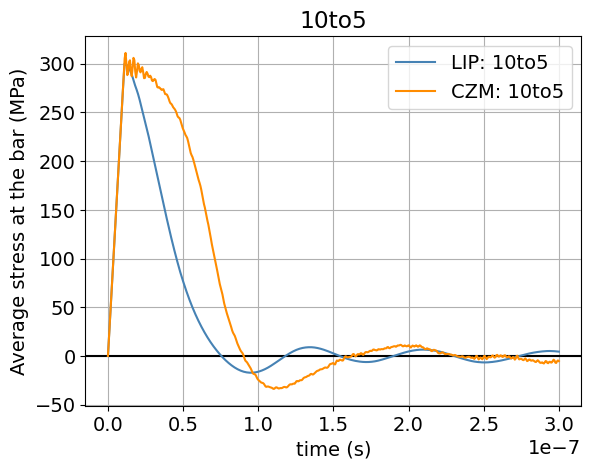

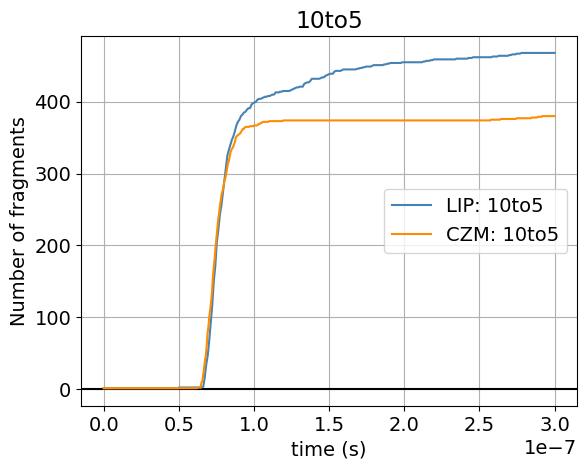

-88.0


In [103]:
# lip_time_10to3 = np.linspace(0, lip_time_simulation_10to3, lip_size_10to3)
# aka_time_10to3 = np.linspace(0, aka_time_simulation_10to3, aka_size_10to3)
lip_time_10to5 = np.linspace(0, lip_time_simulation_10to5, lip_size_10to5)
aka_time_10to5 = np.linspace(0, aka_time_simulation_10to5, aka_size_10to5)


def plotCompareStrainRate(results, title, label_x, label_y, save_filename):

    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)


    name_simulation = results[0][0]
    x_values = results[0][1]
    y_values = results[0][2]
    plt.plot(x_values, y_values, label=name_simulation, color='steelblue')
    name_simulation = results[1][0]
    x_values = results[1][1]
    y_values = results[1][2]
    plt.plot(x_values, y_values, label=name_simulation, color='darkorange')
    
    plt.legend()
    plt.savefig(save_filename)
    plt.show()





# stress_bar = [
#     ["LIP: 10to3", lip_time_10to3, lip_avg_stress_bar_10to3/10**6],
#     ["CZM: 10to3", aka_time_10to3, aka_avg_stress_bar_10to3/10**6],
# ]
stress_bar = [
    ["LIP: 10to5", lip_time_10to5, lip_avg_stress_bar_10to5/10**6],
    ["CZM: 10to5", aka_time_10to5, aka_avg_stress_bar_10to5/10**6],
]


plotCompareStrainRate(
    stress_bar,
    title="10to5",
    label_x="time (s)",
    label_y="Average stress at the bar (MPa)",
    save_filename="LOG/mesh_study/plots/10to5.svg",
)

nfrag = [
    ["LIP: 10to5", lip_time_10to5, lip_n_fragments_10to5],
    ["CZM: 10to5", aka_time_10to5, aka_n_fragments_10to5],
]
plotCompareStrainRate(
    nfrag,
    title="10to5",
    label_x="time (s)",
    label_y="Number of fragments",
    save_filename="LOG/mesh_study/plots/10to5",
)

diff = max(aka_n_fragments_10to5) - max(lip_n_fragments_10to5)
print(diff)